## Data Preparation

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading the Dataset
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Rows & Cols
data.shape

(891, 12)

In [ ]:
# Checking for Columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Preprocessing and Data Cleaning

In [ ]:
# Checking for data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
for col in ['Name','Sex','Ticket','Cabin','Embarked']:
    data[col] = data[col].astype('category')

In [ ]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

### Handling Duplicated Values

In [ ]:
# Checking for Duplicated Values
data.duplicated().sum()

0

### Null Values Treatment

In [ ]:
# Checking for Null Values
nval = data.isna().sum().sort_values(ascending=False)
nval = nval[nval>0]
nval

Cabin       687
Age         177
Embarked      2
dtype: int64

In [ ]:
# Checking what percentage column contain missing values
data.isnull().sum().sort_values(ascending=False)*100/len(data)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [ ]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
data.drop(columns = 'Cabin', axis = 1, inplace = True)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Data Imputation

In [ ]:
# Filling Null Values in Age column with mean values of age column
data['Age'].fillna(data['Age'].mean(),inplace=True)

# Filling Null Values in Embarked Column with mode values of embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [ ]:
# Checking for null values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Checking for Unique Values

In [ ]:
# Finding no. of unique values in each column of dataset
data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

### Showing unique values of different columns

In [ ]:
data['Survived'].unique()

array([0, 1])

In [ ]:
data['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [ ]:
data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
data['Embarked'].unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

## Dropping Unnecessary Columns

In [ ]:
data.drop(columns=['Name','Ticket'],axis=1,inplace=True)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Showing inforamation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 50.8 KB


### Statistical Info

In [ ]:
# showing info about numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,47.000000,1.000000,2.000000,77.958300
95%,846.500000,1.000000,3.000000,54.000000,3.000000,2.000000,112.079150
99%,882.100000,1.000000,3.000000,65.000000,5.000000,4.000000,249.006220


In [ ]:
# showing info about categorical columns
data.describe(include='category')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


## Data Visualization

In [ ]:
d1 = data['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

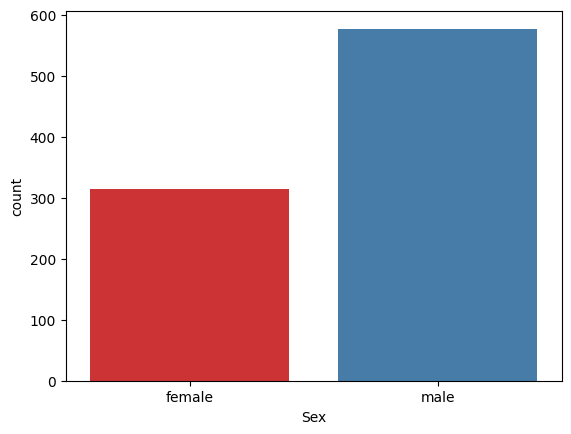

In [ ]:
# Plotting Count Plot for sex column
sns.countplot(x=data['Sex'],palette="Set1")
sns.set_theme(style="whitegrid")
plt.show()

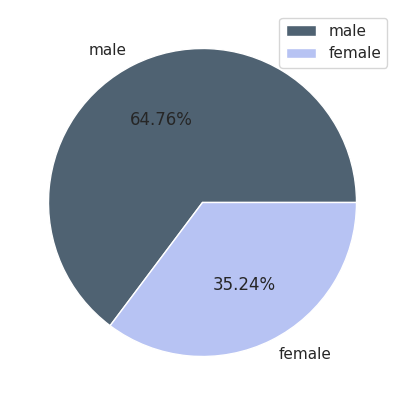

In [ ]:
# Create a set of colors
colors = ['#4F6272', '#B7C3F3']
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%',colors=colors)
plt.legend()
plt.show()

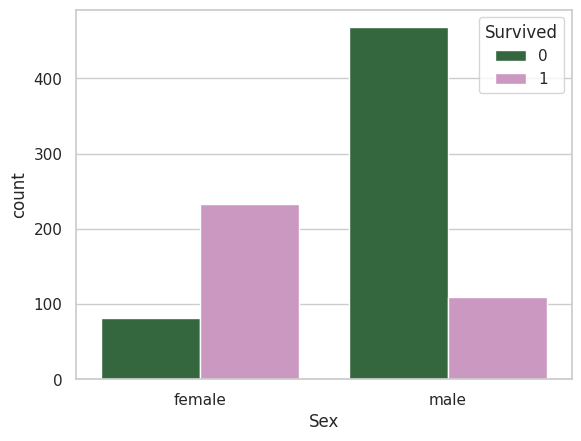

In [ ]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=data['Sex'],hue=data['Survived'],palette="cubehelix") # In Sex (0 represents female and 1 represents male)
sns.set_theme(style="whitegrid")
plt.show()

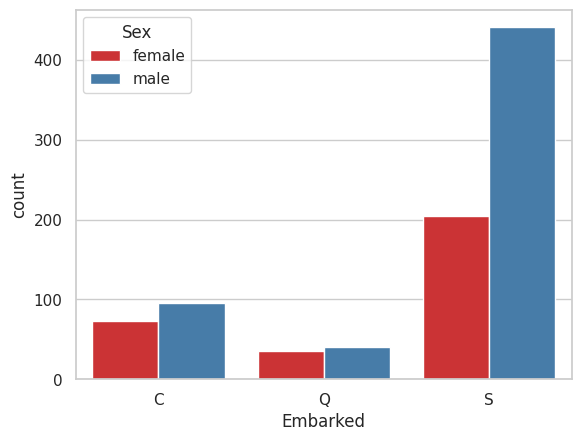

In [ ]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=data['Embarked'],hue=data['Sex'],palette="Set1")
sns.set_theme(style="whitegrid")
plt.show()

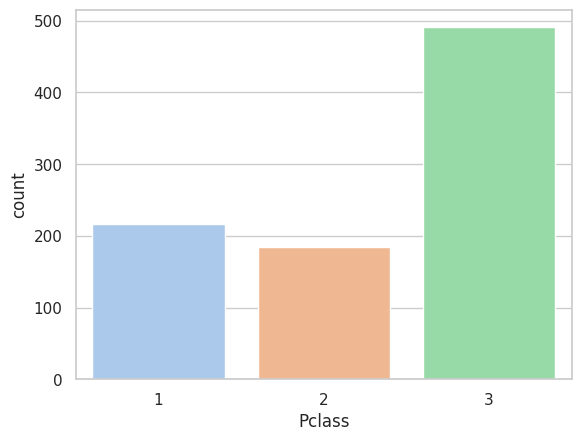

In [ ]:
# Plotting CountPlot for Pclass Column
sns.countplot(x=data['Pclass'],palette='pastel')
plt.show()

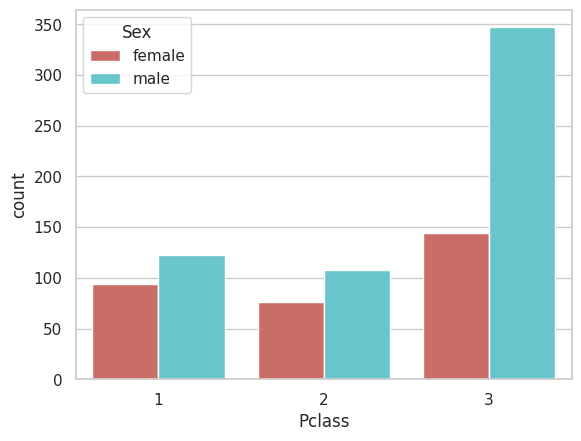

In [ ]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=data['Pclass'],hue=data['Sex'],palette='hls')
plt.show()

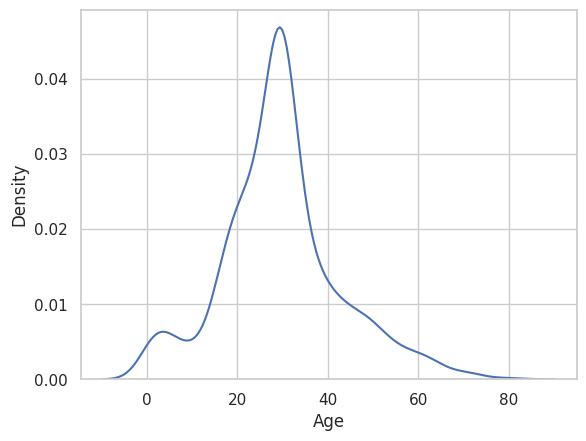

In [ ]:
# Age Distribution
sns.kdeplot(x=data['Age'])
sns.set_theme(style="whitegrid")
plt.show()

### Analysing Target Variable

0    549
1    342
Name: Survived, dtype: int64


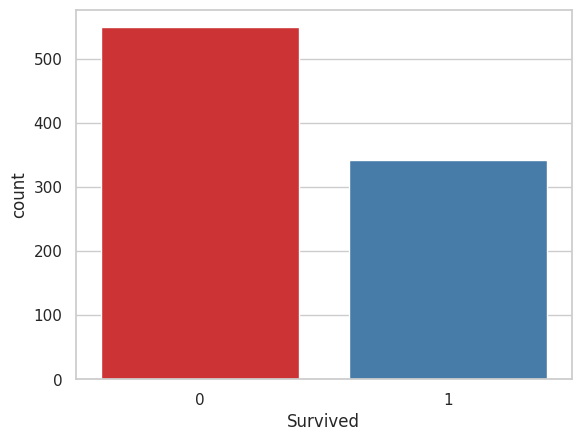

In [ ]:
# Plotting CountPlot for Survived Column
print(data['Survived'].value_counts())
sns.countplot(x=data['Survived'],palette='Set1')
plt.show()

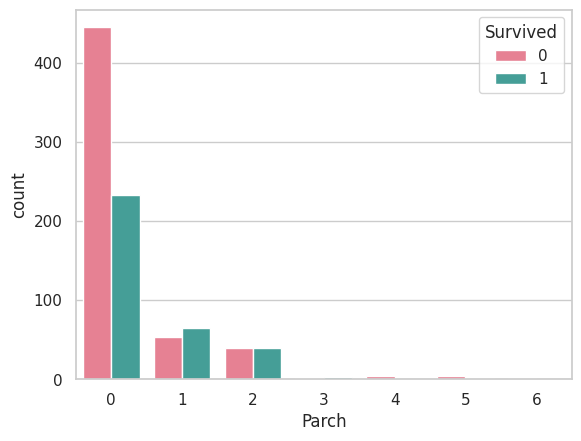

In [ ]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=data['Parch'],hue=data['Survived'],palette='husl')
plt.show()

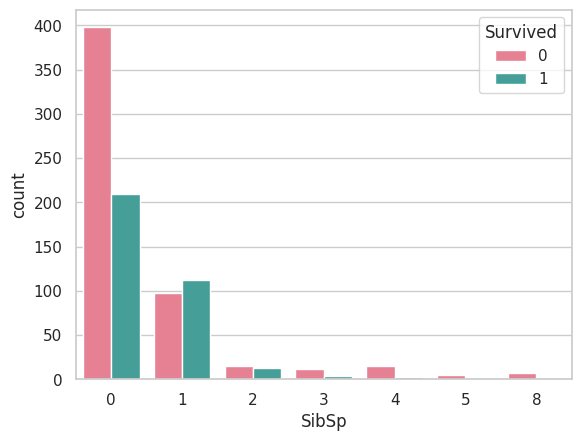

In [ ]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=data['SibSp'],hue=data['Survived'],palette='husl')
plt.show()

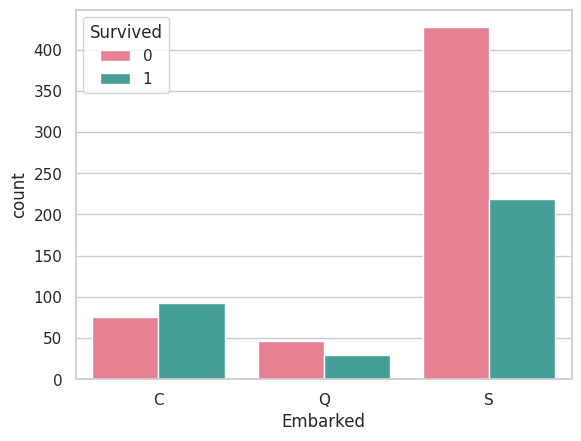

In [ ]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=data['Embarked'],hue=data['Survived'],palette='husl')
plt.show()

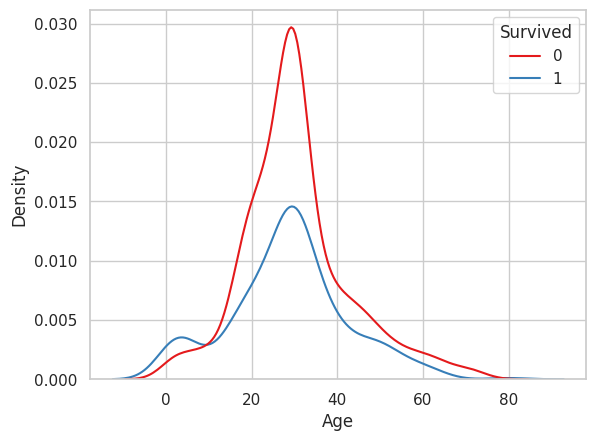

In [ ]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=data['Age'],hue=data['Survived'],palette='Set1')
sns.set_theme(style="whitegrid")
plt.show()

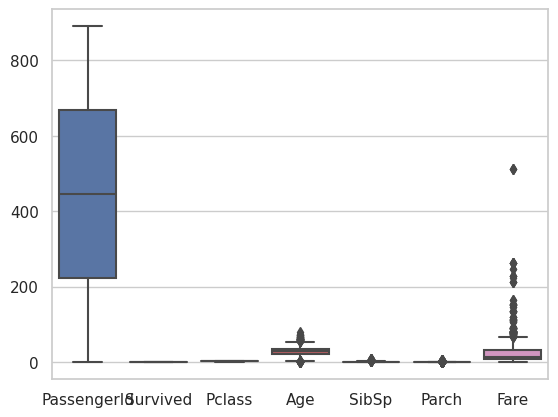

In [ ]:
# Plotting Boxplot for dataset & Checking for outliers
sns.boxplot(data)
plt.show()

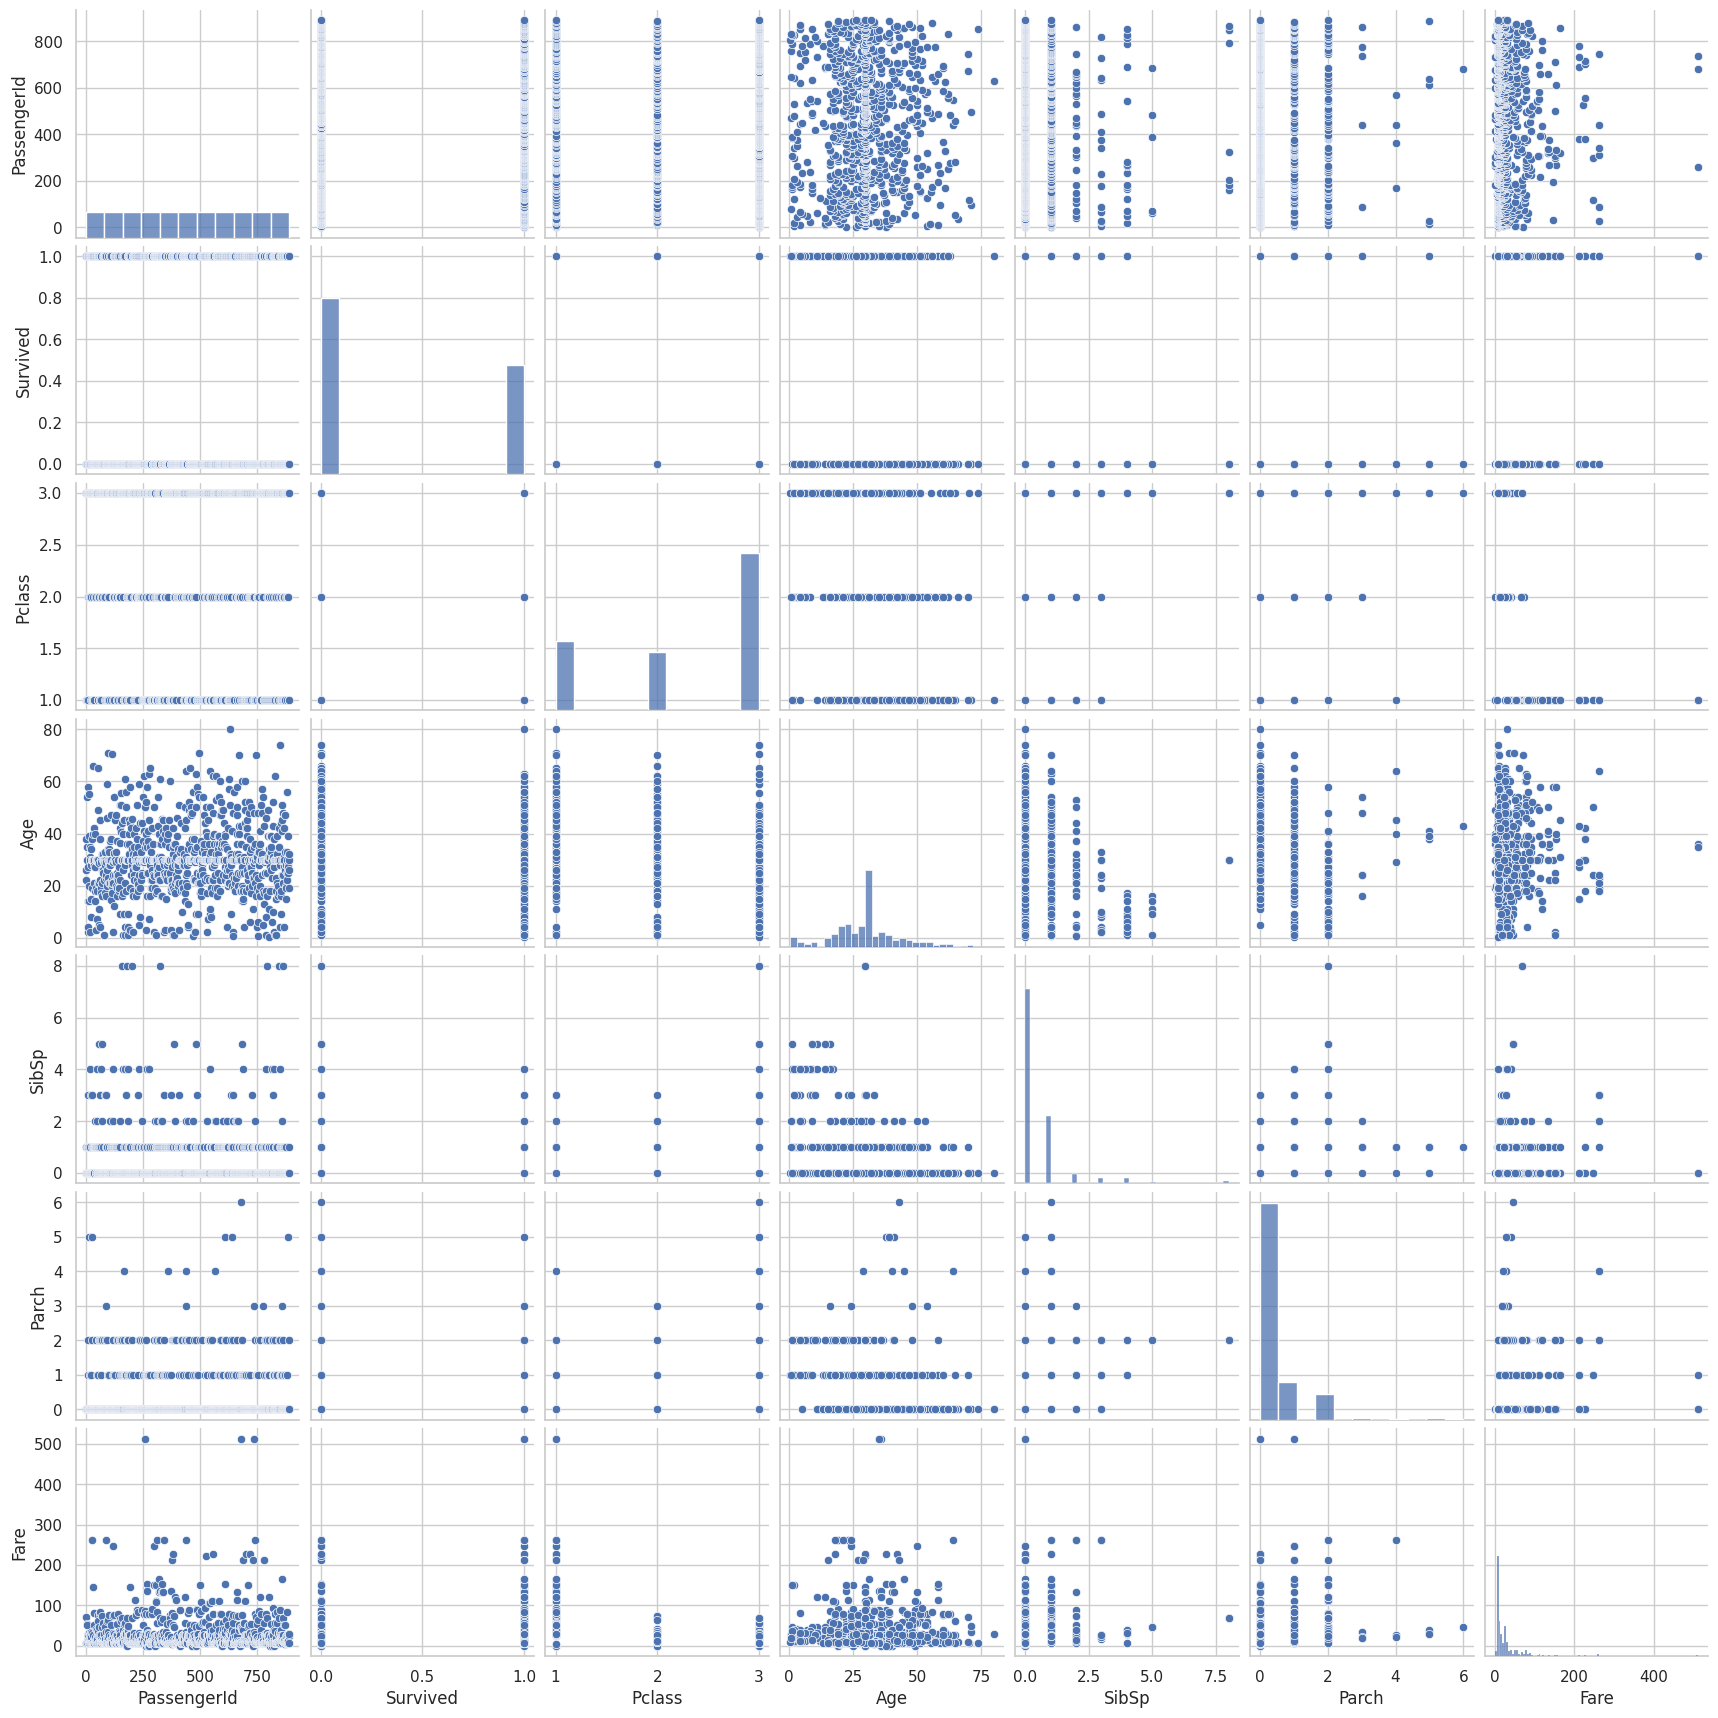

In [ ]:
# Plotting pairplot
sns.pairplot(data)
plt.show()

## Checking the target variable

In [ ]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

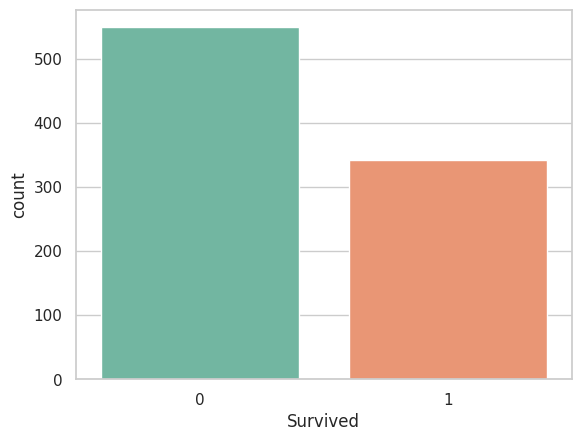

In [ ]:
sns.countplot(x=data['Survived'],palette='Set2')
plt.show()

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

## Choosing the independent and dependent Features

In [ ]:
cols = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = data[cols]
y = data['Survived']
print(X.shape)
print(y.shape)
print(type(X))  # DataFrame
print(type(y))  # Series

(891, 8)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train_Test_Split

In [ ]:
print(891*0.25)

222.75


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [ ]:
y_train.value_counts(True)

0    0.621257
1    0.378743
Name: Survived, dtype: float64

In [ ]:
y_test.value_counts(True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
pd.value_counts(y_train)/y_train.size * 100

0    62.125749
1    37.874251
dtype: float64

## OneHotEncoding

In [ ]:
cat_attr = X_train.select_dtypes(include=['category']).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first')
enc.fit(X_train[cat_attr])

X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

## Standardization

In [ ]:
num_attr = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

## Concatenate

In [ ]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

## Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [ ]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(X_train_con,y_train))  # Training Accuracy
    print('Testing Score',model.score(X_test_con,y_test))     # Testing Accuracy

## Data Modelling

In [ ]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### 1.Logistic Regression

In [ ]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(X_train_con,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Computing Training and Testing score
mscore(lr)

Training Score 0.7994011976047904
Testing Score 0.7982062780269058


In [ ]:
# Generating Prediction
ypred_lr = lr.predict(X_test_con)
print(ypred_lr)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[113  21]
 [ 24  65]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.76      0.73      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

Accuracy Score 0.7982062780269058


### 2.KNN Classifier Model

In [ ]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_con,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.8263473053892215
Testing Score 0.8071748878923767


In [ ]:
# Generating Prediction
ypred_knn = knn.predict(X_test_con)
print(ypred_knn)

[0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[124  10]
 [ 33  56]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       134
           1       0.85      0.63      0.72        89

    accuracy                           0.81       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223

Accuracy Score 0.8071748878923767


### 3.Support Vector Classifier(SVC)

In [ ]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(X_train_con, y_train)

SVC()

In [ ]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.8368263473053892
Testing Score 0.8116591928251121


In [ ]:
# Generating Prediction
ypred_svc = svc.predict(X_test_con)
print(ypred_svc)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[117  17]
 [ 25  64]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       134
           1       0.79      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

Accuracy Score 0.8116591928251121


### 4.Random Forest Classifier

In [ ]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(X_train_con,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [ ]:
# Computing Training and Testing score
mscore(rfc)

Training Score 0.9221556886227545
Testing Score 0.8161434977578476


In [ ]:
# Generating Prediction
ypred_rfc = rfc.predict(X_test_con)
print(ypred_rfc)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[122  12]
 [ 29  60]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       134
           1       0.83      0.67      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223

Accuracy Score 0.8161434977578476


### 5.DecisionTree Classifier

In [ ]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(X_train_con, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.844311377245509
Testing Score 0.8116591928251121


In [ ]:
# Generating Prediction
ypred_dt = dt.predict(X_test_con)
print(ypred_dt)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[119  15]
 [ 27  62]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       134
           1       0.81      0.70      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

Accuracy Score 0.8116591928251121


## Create dataframe for comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','SVC','Random Forest Classifier','Decision Tree Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.816143
2,SVC,0.811659
4,Decision Tree Classifier,0.811659
1,KNN,0.807175
0,Logistic Regression,0.798206


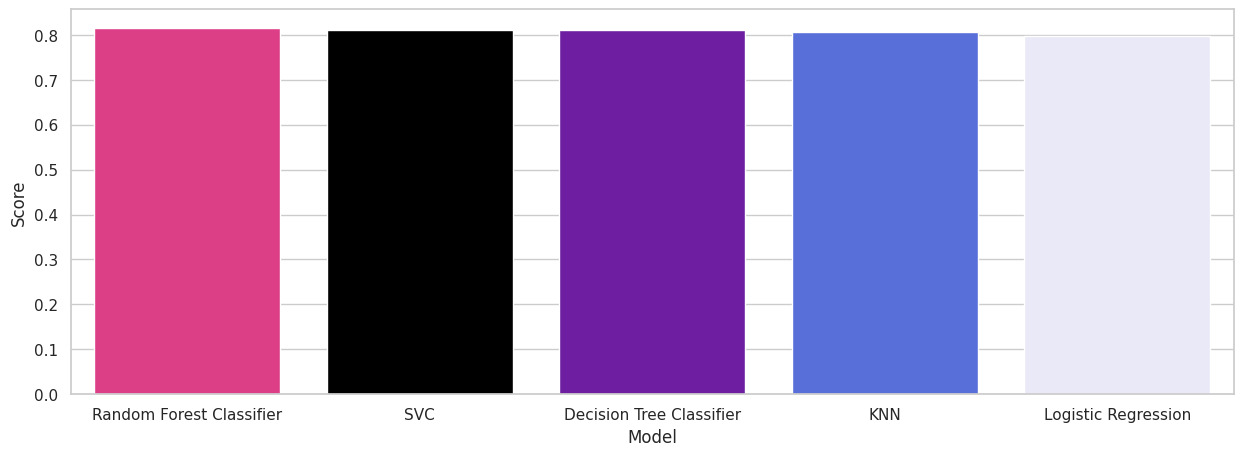

In [ ]:
colors = ["#F72585", "black", "#7209B7", "#4361EE" , "lavender"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'], y=models['Score'], palette=colors,  order=models.sort_values('Score',ascending = False).Model)
plt.show()

In [ ]:
titanic = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': ypred_rfc})
titanic.to_csv('titanic_submission.csv', index=False)
print("Submission is successfully saved!")

Submission is successfully saved!
